#### When to use Simulations

* not feasible to do the actual experiment
* cost is prohibitive
* system does not exist yet
* want to test alternatives (counterfactuals)

#### Monte Carlo Simulation

* stochastic simulation involves **pseudorandom numbers**
* simulations are often called **Monte Carlo simulations**
* A Monte Carlo simulation is a probabilistic model involving an element of chance

#### Disadvatageous Aspects

* simulation may be expensive in time or money to develop
* impossible to test every alternative - so good solutions but not best
* need to be careful of conclusions due to probabilistic nature of simulation
* results may be difficult to verify for lack of real-world data
* cannot be sure we understand what the simulation does (black box)

#### History Lesson

* Monte Carlo simulation developed by John von Neumann and Stanislaus Ulam during work on Manhattan Project
* Know behavior of one neutron but did not have a formula for a system
* Needed to know system behavior to construct dampers and shields for atomic bombs
* Experimentation, obviously, too time consuming and dangerous

#### Linear congruential method

* D.J. Lehmer (1949) presented a technig for generating uniformly distributed prn.
$$r_0=seed$$
$$r_n=\left(multiplier \times r_{n-1}+increment\right) \text{ mod } modulus\text{, for }n>0$$
* $seed$, $modulus$, and $multiplier$ are positive integers and $increment$ is a nonnegative integer

* Let's generate random integers in [0,10].

$$r_0 = 10$$
$$r_n=(7r_{n-1}+1)\;mod\;11\text{, for }n > 0$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
r0 = 10
rn = r0
random_numbers = []
for i in range(100):
    rn = (7*rn + 1) % 11
    random_numbers.append(rn)

In [16]:
random_numbers[:10]

[5, 3, 0, 1, 8, 2, 4, 7, 6, 10]

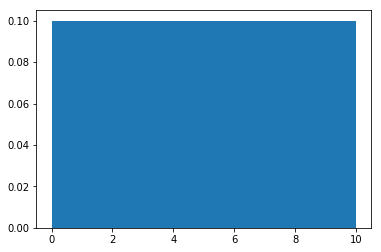

In [17]:
fig, ax = plt.subplots()
ax.hist(random_numbers, bins=10, normed=True);
plt.show()

* What if we wanted floating point numbers between 0 and 1?
* Divide the sequence by the **modulus**
* This gives us numbers in [0, 1)
* The largest number would be $(modulus-1)/modulus$

* **Aside**: **broadcasting**!

In [18]:
float_prn = np.array(random_numbers)/11.

In [19]:
float_prn[:10]

array([ 0.45454545,  0.27272727,  0.        ,  0.09090909,  0.72727273,
        0.18181818,  0.36363636,  0.63636364,  0.54545455,  0.90909091])

* Not all choices of multiplier and modulus are good
* Consider a choice of 5 and 11
$$r_0 = 10$$
$$r_1 = (5\times10+1)\text{ mod }11=7$$
$$r_2 = (5\times7+1)\text{ mod }11=3$$
$$r_3 = (5\times3+1)\text{ mod }11=5$$
$$r_4 = (5\times5+1)\text{ mod }11=4$$
$$r_5 = (5\times4+1)\text{ mod }11=10$$
$$r_6 = (5\times10+1)\text{ mod }11=7$$
$$\vdots$$

In [20]:
r0 = 10
rn = r0
random_numbers = []
for i in range(15):
    rn = (5*rn + 1) % 11
    random_numbers.append(rn)

In [21]:
random_numbers

[7, 3, 5, 4, 10, 7, 3, 5, 4, 10, 7, 3, 5, 4, 10]

* This is an example of what is called the **periodicty** of a PRNG
* The **period** is the maximum length of a repition-free sequence for all possible seeds
* Best choices of $multiplier$ and $modulus$ have been researched heavily
* Modulus is often max integer, such as, $2^{31}-1$, platform dependent
* For this modulus, a multiplier of 16,807, and an increment of 0 this PNRG produces a sequence of $2^{31}-2$ elements

* another potential problem is non-randomness

In [22]:
r0 = 10
rn = r0
random_numbers = []
for i in range(10):
    rn = (2*rn) % 11
    random_numbers.append(rn)

In [23]:
random_numbers

[9, 7, 3, 6, 1, 2, 4, 8, 5, 10]

In [24]:
random_numbers[4:8]

[1, 2, 4, 8]

#### Area Through Monte Carlo Simulation

* Much of calculus is concerned with finding the area between a curve and the x-axis over a certain interval
* With integration we can compute the exact area of many functions
* For other, this is impossible
* For example, take 

$$f(x)=\sqrt{cos^2(x)+1}$$

between $0$ and $2$.

In [25]:
import matplotlib.pyplot as plt

In [26]:
def func(x):
    return np.sqrt(np.cos(x)**2+1)

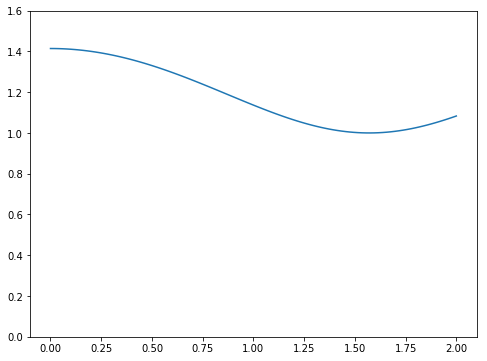

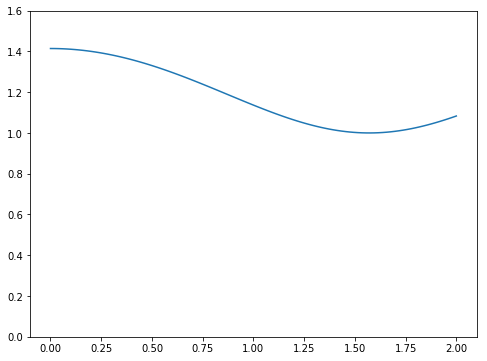

In [28]:
x = np.linspace(0,2,100)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, func(x))
ax.set_ylim(0, 1.6);
plt.show()

* we cannot integrate to find the area under the curve because this function does not have an antiderivative that is an elementary function

#### "Throwing Darts for Area"

$$\text{area}\approx(\text{area of enclosing rectangle})\left(\frac{\text{# darts below}}{\text{# darts}}\right)$$

* Take some bounding rectangle, say $2\times1.5$.
* area = $(2)(1.5)=3$
* If we throw 1000 darts and 778 of them hit below the graph, then 778/1000=.778=77.8%
* This is our estimate of the percentage of the rectangle below the curve
$$area\approx3.0\times778/1000=2.334$$

* This is an example of a method called **rejection sampling** or **acceptance-rejection sampling**
* The candidate distribution here is the proposal distribution (hence the rectangle)

**Review Question** Write code that does this. Steps:

1. Pick recangular bounds for x - (0, 2) - and y - (0, 1.5)
2. Use `np.random.uniform` to draw 1000 x points and 1000 y points.
3. Calculate the true values of y at your sample x points.
4. Plot the random points on the graph and the curve.
5. What percentage of the random y points are below the true y points?
6. What is the approximate area under the curve?